# Data Specialist Challenge

## Cargar librerías

In [2]:
    %matplotlib inline

import re
import random
from collections import Counter

import pandas as pd
pd.set_option('display.max_colwidth', -1)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kstest
sns.set(color_codes=True)

In [0]:
#Importamos la librería Drive para poder montar la unidad de Google Drive y poder leer los .csv que tenemos almacenados
from google.colab import drive

In [3]:
#Montamos la unidad de Google Drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#Leemos el fichero .csv y lo almacenamos en una variable para poder leer los datos
#Como el separador de los ficheros es la coma no hace falta indicar el separador
train = pd.read_csv('/content/drive/My Drive/train.csv')

In [5]:
#Con un head(),sample() y tail() revisamos que la lectura de los ficheros ha sido correcta
train.head(20)

,Unnamed: 0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,0,7546,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,1,27999,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,2,24653,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,3,12758,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,19638,50000.0,1,1,2,37,0,0,0,0,0,0,64400.0,57069.0,57608.0,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0
5,8,7409,140000.0,2,3,1,28,0,0,2,0,0,0,11285.0,14096.0,12108.0,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0
6,9,3918,20000.0,1,3,2,35,-2,-2,-2,-2,-1,-1,0.0,0.0,0.0,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0
7,10,22917,200000.0,2,3,2,34,0,0,2,0,0,-1,11073.0,9787.0,5535.0,2513.0,1828.0,3731.0,2306.0,12.0,50.0,300.0,3738.0,66.0,0
8,11,3596,260000.0,2,1,2,51,-1,-1,-1,-1,-1,2,12261.0,21670.0,9966.0,8517.0,22287.0,13668.0,21818.0,9966.0,8583.0,22301.0,0.0,3640.0,0
9,12,20692,630000.0,2,2,2,41,-1,0,-1,-1,-1,-1,12137.0,6500.0,6500.0,6500.0,6500.0,2870.0,1000.0,6500.0,6500.0,6500.0,2870.0,0.0,0


In [6]:
train.sample(3)

,Unnamed: 0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
3523,4997,27840,200000.0,2,2,1,45,0,0,0,0,0,0,193641.0,121830.0,122181.0,121888.0,66771.0,65495.0,4543.0,5000.0,4500.0,3100.0,3000.0,1300.0,1
7303,10406,13508,360000.0,1,1,2,29,-2,-2,-2,-2,-2,-2,12018.0,31282.0,28823.0,51120.0,2222.0,-34.0,32038.0,28982.0,51379.0,2233.0,0.0,0.0,0
5097,7254,10732,60000.0,1,3,3,43,0,0,0,0,0,0,70367.0,66657.0,63553.0,59633.0,55689.0,52778.0,2415.0,3000.0,2125.0,2007.0,3000.0,1758.0,0


In [7]:
train.tail(3)

,Unnamed: 0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
23097,32994,26025,50000.0,2,1,2,28,-2,-1,0,0,0,-1,2427.0,99895.0,23946.0,0.0,169821.0,-600.0,1921.0,8000.0,2989.0,1500.0,4867.0,2500.0,1
23098,32995,24330,60000.0,1,2,2,34,0,0,-1,-2,0,-1,9211.0,9017.0,129752.0,14188.0,19630.0,30064.0,4000.0,7000.0,2000.0,2688.0,1331.0,390.0,1
23099,32997,7936,50000.0,2,1,2,27,0,2,-1,2,-2,0,78317.0,0.0,11349.0,12460.0,18694.0,95849.0,3470.0,18069.0,1890.0,5000.0,0.0,1179.0,1


In [8]:
#Realizamos un describe para ver el número de clientes que estamos analizando (count), así como los principales estadísticos de las variables
train.describe()

,Unnamed: 0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,23100.000000,23100.000000,23100.000000,23100.000000,23100.000000,23100.000000,23100.000000,23100.000000,23100.000000,23100.000000,23100.000000,23100.000000,23100.000000,23100.000000,23100.000000,2.310000e+04,23100.000000,23100.000000,23100.000000,23100.000000,2.310000e+04,23100.000000,23100.000000,23100.000000,23100.000000,23100.000000
mean,16474.670476,16468.563896,167989.163636,1.602208,1.852208,1.549913,35.455325,-0.019048,-0.135801,-0.158658,-0.212684,-0.260130,-0.287749,51498.252294,49146.355022,4.722492e+04,43325.902944,40500.097273,39217.749048,5669.638095,5.888583e+03,5129.960433,4853.600823,4720.761861,5123.908528,0.219610
std,9525.801909,9550.228241,129338.546909,0.489453,0.793045,0.521973,9.183387,1.127785,1.202206,1.205919,1.172068,1.138868,1.152518,73352.059617,70438.086129,6.943315e+04,64198.241095,60637.587470,59534.495324,15836.304600,2.388192e+04,16070.701800,15444.795302,14580.017686,16965.122468,0.413992
min,0.000000,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-61372.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8233.750000,8139.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3610.750000,2986.000000,2.754000e+03,2299.500000,1792.750000,1294.750000,1000.000000,8.315000e+02,390.000000,300.000000,230.000000,111.750000,0.000000
50%,16468.500000,16459.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22375.000000,21410.000000,2.012450e+04,18950.000000,18152.500000,17206.000000,2134.000000,2.015000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,24694.500000,24743.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67938.500000,64397.500000,6.095400e+04,54814.250000,50590.000000,49784.500000,5014.000000,5.000000e+03,4500.000000,4006.000000,4058.500000,4000.000000,0.000000
max,32997.000000,33000.000000,800000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,743970.000000,1.664089e+06,706864.000000,823540.000000,699944.000000,505000.000000,1.684259e+06,508229.000000,497000.000000,426529.000000,527143.000000,1.000000


In [9]:
#Vemos si existen clientes con más de un crédito
train['ID'].nunique()

23100

Al observar el describe podemos identificar algunas primeras ideas siguiente:

*   Tenemos  23.100 créditos de diferentes clientes
*   La edad media es 35,45 años, 
*   El porcentaje de créditos impagados está en torno a un 22%
*   El valor promedio de los créditos es de 167.989 $ taiwaneses



In [10]:
#Vemos el número de variables que contienen el dataset
train.shape

(23100, 26)

## Data Wrangling



### Cambiar los nombres de las columnas para que cumplan buenas prácticas

In [0]:
#Hacemos que todos los nombres de las variables estén en minúscula
train.columns = [x.lower() for x in train.columns]

In [12]:
train.columns

Index(['unnamed: 0', 'id', 'limit_bal', 'sex', 'education', 'marriage', 'age',
       'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1',
       'bill_amt2', 'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6',
       'pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6',
       'default.payment.next.month'],
      dtype='object')

### Estudiar el formato de las variables, ver cuáles se deberían modificar y modificarlas cuando se considere oportuno

In [13]:
#Comprobamos los tipos de los datos y revisamos los datos para ver si tenemos que cambiar algún tipo
train.dtypes

unnamed: 0                    int64  
id                            int64  
limit_bal                     float64
sex                           int64  
education                     int64  
marriage                      int64  
age                           int64  
pay_0                         int64  
pay_2                         int64  
pay_3                         int64  
pay_4                         int64  
pay_5                         int64  
pay_6                         int64  
bill_amt1                     float64
bill_amt2                     float64
bill_amt3                     float64
bill_amt4                     float64
bill_amt5                     float64
bill_amt6                     float64
pay_amt1                      float64
pay_amt2                      float64
pay_amt3                      float64
pay_amt4                      float64
pay_amt5                      float64
pay_amt6                      float64
default.payment.next.month    int64  
dtype: objec

Por lo que observamos, los nombres de las variables:

*  pay_n: estado de reembolso en el mes n
*  bill_amtn: saldo en la cuenta corriente donde se carga la deuda en el mes n
*  pay_amtn= importe del pago en anterior en el mes n

Son algo confusos ya que cuando n=0 estamos hablando del momento más cercano en el tiempo, lo que haremos será renombrarlas para tenerlas ordenadas cronológicamente (igual después nos sirve si hacemos un diagrama en el que una variable es el tiempo).

La variable objeto de estudio también la renombramos a "default" por comodidad y por cumplir las buenas prácticas ya que trabajaremos con ella posteriormente. Tenemos en cuenta que default= 1 quiere decir que el cliente no ha pagado el crédito

In [0]:
train = train.rename(columns={'default.payment.next.month':'default','pay_0':'repay_status_sep05',
                      'pay_2':'repay_status_aug05','pay_3':'repay_status_jul05','pay_4':'repay_status_jun05',
                      'pay_5':'repay_status_may05','pay_6':'repay_status_apr05','bill_amt1':'bill_amt_sep05',
                      'bill_amt2':'bill_amt_aug05','bill_amt3':'bill_amt_jul05','bill_amt4':'bill_amt_jun05',
                      'bill_amt5':'bill_amt_may05','bill_amt6':'bill_amt_apr05','pay_amt1':'pay_amt_sep05',
                      'pay_amt2':'pay_amt_aug05','pay_amt3':'pay_amt_jul05','pay_amt4':'pay_amt_jun05',
                      'pay_amt5':'pay_amt_may05','pay_amt6':'pay_amt_apr05'})

In [15]:
#Eliminamos la variable 'unnamed: 0', ya que no aporta información relevante al modelo
train = train.drop(columns=['unnamed: 0'])
print(train.shape)

(23100, 25)


In [0]:
#Cambiamos el tipo de dato de las variables ID , education y marriage porque no vamos a hacer operaciones con ellos 
#y son códigos que equivalen a determinados estados
train['id']=train['id'].astype('str')
train['education']=train['education'].astype('str')
train['marriage']=train['marriage'].astype('str')

In [17]:
#Revisamos que las variables modificadas ahora son String
train.dtypes

id                    object 
limit_bal             float64
sex                   int64  
education             object 
marriage              object 
age                   int64  
repay_status_sep05    int64  
repay_status_aug05    int64  
repay_status_jul05    int64  
repay_status_jun05    int64  
repay_status_may05    int64  
repay_status_apr05    int64  
bill_amt_sep05        float64
bill_amt_aug05        float64
bill_amt_jul05        float64
bill_amt_jun05        float64
bill_amt_may05        float64
bill_amt_apr05        float64
pay_amt_sep05         float64
pay_amt_aug05         float64
pay_amt_jul05         float64
pay_amt_jun05         float64
pay_amt_may05         float64
pay_amt_apr05         float64
default               int64  
dtype: object

In [0]:
#Convertimos los estados "Unknown" de la variable 'Education' en nulos para ajustar los datos a la descripción del dataset
#Hacemos lo mismo con el valor 0 de la variable 'Marriage', ya que no se contempla ese valor en la descripción
train['education']=train['education'].replace("5", np.nan).replace("6",np.nan).replace('0',np.nan)
train['marriage']=train['marriage'].replace('0', np.nan)

In [0]:
#Como la variable sex solo tienen 2 valores posibles, transformamos los valores a dos valores binarios 0 (hombre) y 1 (mujer) , ya que será más fácil de interpretar para los modelos
train['female_bin']= train['sex'].replace(1,0).replace(2,1)
train = train.drop(columns=['sex'])

In [0]:
#Como la variable marriage solo tiene 2 valores posibles, transformamos los valores a dos valores binarios 0 (soltero) y 1 (casado) , ya que será más fácil de interpretar para los modelos
train['married_bin']= train['marriage'].replace('2',0).replace('3',0).replace('1',1)
train = train.drop(columns=['marriage'])

### Estudiar si hay registros repetidos

In [21]:
#Revisamos si hay algún registro duplicado

if train.duplicated().any() == True:
  print("Hay registros duplicados. Eliminar con drop_duplicates()")
else:
  print("No hay registros duplicados")

No hay registros duplicados


### Estudiar si hay variables que siempre o prácticamente siempre toman el mismo valor: tomar siempre el mismo valor no aporta información al modelo

In [0]:
#Calculamos qué variables tienen el mismo valor para todos los campos
for columna,fila in train.items(): 
  if train[columna].nunique() == 1:
    print(columna)

No nos hemos encontrado variables que tomen siempre el mismo valor, por lo que no eliminamos ninguna columna

In [23]:
#Vamos recorriendo las columnas y miramos primero cuántos datos distintos tiene cada columna para comprobar,
#entre otras cosas, que las nuevas variables binarias se han generado correctamente
train.nunique()

id                    23100
limit_bal             77   
education             4    
age                   56   
repay_status_sep05    11   
repay_status_aug05    11   
repay_status_jul05    11   
repay_status_jun05    11   
repay_status_may05    10   
repay_status_apr05    10   
bill_amt_sep05        17088
bill_amt_aug05        16823
bill_amt_jul05        16578
bill_amt_jun05        16276
bill_amt_may05        15815
bill_amt_apr05        15547
pay_amt_sep05         6505 
pay_amt_aug05         6420 
pay_amt_jul05         6099 
pay_amt_jun05         5662 
pay_amt_may05         5643 
pay_amt_apr05         5627 
default               2    
female_bin            2    
married_bin           2    
dtype: int64

In [24]:
#Creamos una lista con el valor que más se repite de la columna y cuántas veces se repite
lista = []
[lista.append((train[i].value_counts().sort_values(ascending = False).index[0],(train[i].value_counts().sort_values(ascending = False)).iloc[0])) for i in train.columns]
lista

[('13270', 1),
 (50000.0, 2572),
 ('2', 10828),
 (29, 1219),
 (0, 11367),
 (0, 12121),
 (0, 12141),
 (0, 12683),
 (0, 13070),
 (0, 12514),
 (0.0, 1517),
 (0.0, 1882),
 (0.0, 2134),
 (0.0, 2452),
 (0.0, 2658),
 (0.0, 3043),
 (0.0, 4006),
 (0.0, 4137),
 (0.0, 4612),
 (0.0, 4869),
 (0.0, 5197),
 (0.0, 5546),
 (0, 18027),
 (1, 13911),
 (0.0, 12493)]

In [25]:
#Una vez tenemos el valor que más se repite, dividimos el número de repeticiones entre el total de registros para calcular el porcentaje. Si ese porcentaje es >98% lo añadimos a la lista de borrado
lista_porcentaje = []
contador = 0
for i in lista:
  if (i[1]/train.shape[0] > 0.98):
    lista_porcentaje.append((train.columns[contador], i[1]/train.shape[0]))
  contador = contador + 1
lista_porcentaje

[]

Como vemos en ninguna variable hay un valor que se repita el 98% de las veces o más.

### Estudiar los nulos en el dataset

In [26]:
#Miramos si en alguna de las columnas tenemos un valor nulo. Sólo aparecen aquellas que hemos generado nosotros.
train.isnull().any()

id                    False
limit_bal             False
education             True 
age                   False
repay_status_sep05    False
repay_status_aug05    False
repay_status_jul05    False
repay_status_jun05    False
repay_status_may05    False
repay_status_apr05    False
bill_amt_sep05        False
bill_amt_aug05        False
bill_amt_jul05        False
bill_amt_jun05        False
bill_amt_may05        False
bill_amt_apr05        False
pay_amt_sep05         False
pay_amt_aug05         False
pay_amt_jul05         False
pay_amt_jun05         False
pay_amt_may05         False
pay_amt_apr05         False
default               False
female_bin            False
married_bin           True 
dtype: bool

In [27]:
#Comprobamos los posibles valores de Education
diff_value_education = []
for i in train['education']:
  if i not in diff_value_education:
    diff_value_education.append(i)
print(diff_value_education)

['2', '1', '3', nan, '4']


In [28]:
#Como hemos metido nulos, recalculamos el porcentaje en Marriage y Education
print(((train['married_bin'].isna().sum() / len(train['married_bin']))*100),
      (train['education'].isna().sum() / len(train['education'])*100))

0.16883116883116883 1.2034632034632036


Vemos que el número de nulos no supone un problema en el dataset

### Estudiar los outliers


In [0]:
#Creamos un DataFrame que sólo tenga valores numéricos
df_numerical = train.select_dtypes(include = ['int64','float'])

In [0]:
#Definimos la función Tukey Outliers para detectar los outliers
def tukey_outliers(df,column,extreme=False):
    q1, q3 = np.percentile(df[column],[25,75])
    iqr = q3 - q1
    constant = 1.5 if not extreme else 3
    return df[((df[column]>(q3+constant*iqr)) | (df[column]<(q1-constant*iqr)))]

In [31]:
#Ejecutamos la función de Tukey con outliers extremos = false y metemos el número de outliers de cada columna en una lista
lista_tukey = []
[lista_tukey.append((i, tukey_outliers(df_numerical,i,extreme=False).shape[0])) for i in df_numerical.columns]
lista_tukey

[('limit_bal', 120),
 ('age', 187),
 ('repay_status_sep05', 2391),
 ('repay_status_aug05', 3367),
 ('repay_status_jul05', 3270),
 ('repay_status_jun05', 2732),
 ('repay_status_may05', 2287),
 ('repay_status_apr05', 2383),
 ('bill_amt_sep05', 1819),
 ('bill_amt_aug05', 1814),
 ('bill_amt_jul05', 1875),
 ('bill_amt_jun05', 2011),
 ('bill_amt_may05', 2109),
 ('bill_amt_apr05', 2041),
 ('pay_amt_sep05', 2103),
 ('pay_amt_aug05', 2060),
 ('pay_amt_jul05', 1957),
 ('pay_amt_jun05', 2310),
 ('pay_amt_may05', 2228),
 ('pay_amt_apr05', 2289),
 ('default', 5073),
 ('female_bin', 0),
 ('married_bin', 0)]

La variable que más outliers tiene es 'default' pero sólo tiene valores 0 y 1, así que no tiene sentido que se excluyan los outliers y más teniendo en cuenta que es la variable dependiente.

In [32]:
#Ejecutamos la función de Tukey con outliers extremos = false y metemos el número de outliers de cada columna en una lista
lista_tukey = []
[lista_tukey.append((i, tukey_outliers(df_numerical,i,extreme=True).shape[0])) for i in df_numerical.columns]
lista_tukey

[('limit_bal', 0),
 ('age', 0),
 ('repay_status_sep05', 118),
 ('repay_status_aug05', 135),
 ('repay_status_jul05', 130),
 ('repay_status_jun05', 134),
 ('repay_status_may05', 138),
 ('repay_status_apr05', 101),
 ('bill_amt_sep05', 577),
 ('bill_amt_aug05', 584),
 ('bill_amt_jul05', 631),
 ('bill_amt_jun05', 678),
 ('bill_amt_may05', 697),
 ('bill_amt_apr05', 689),
 ('pay_amt_sep05', 1266),
 ('pay_amt_aug05', 1228),
 ('pay_amt_jul05', 1162),
 ('pay_amt_jun05', 1217),
 ('pay_amt_may05', 1178),
 ('pay_amt_apr05', 1258),
 ('default', 5073),
 ('female_bin', 0),
 ('married_bin', 0)]

La conclusión es la misma que en la prueba de Tukey normal, no vamos a eliminar los valores extremos

In [33]:
#Estudiamos los estadísticos de las variables numéricas para ver si hay alguno que tengamos que borrar
df_numerical.describe()

,limit_bal,age,repay_status_sep05,repay_status_aug05,repay_status_jul05,repay_status_jun05,repay_status_may05,repay_status_apr05,bill_amt_sep05,bill_amt_aug05,bill_amt_jul05,bill_amt_jun05,bill_amt_may05,bill_amt_apr05,pay_amt_sep05,pay_amt_aug05,pay_amt_jul05,pay_amt_jun05,pay_amt_may05,pay_amt_apr05,default,female_bin,married_bin
count,23100.000000,23100.000000,23100.000000,23100.000000,23100.000000,23100.000000,23100.000000,23100.000000,23100.000000,23100.000000,2.310000e+04,23100.000000,23100.000000,23100.000000,23100.000000,2.310000e+04,23100.000000,23100.000000,23100.000000,23100.000000,23100.000000,23100.000000,23061.000000
mean,167989.163636,35.455325,-0.019048,-0.135801,-0.158658,-0.212684,-0.260130,-0.287749,51498.252294,49146.355022,4.722492e+04,43325.902944,40500.097273,39217.749048,5669.638095,5.888583e+03,5129.960433,4853.600823,4720.761861,5123.908528,0.219610,0.602208,0.458263
std,129338.546909,9.183387,1.127785,1.202206,1.205919,1.172068,1.138868,1.152518,73352.059617,70438.086129,6.943315e+04,64198.241095,60637.587470,59534.495324,15836.304600,2.388192e+04,16070.701800,15444.795302,14580.017686,16965.122468,0.413992,0.489453,0.498266
min,10000.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-61372.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3610.750000,2986.000000,2.754000e+03,2299.500000,1792.750000,1294.750000,1000.000000,8.315000e+02,390.000000,300.000000,230.000000,111.750000,0.000000,0.000000,0.000000
50%,140000.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22375.000000,21410.000000,2.012450e+04,18950.000000,18152.500000,17206.000000,2134.000000,2.015000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000,1.000000,0.000000
75%,240000.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67938.500000,64397.500000,6.095400e+04,54814.250000,50590.000000,49784.500000,5014.000000,5.000000e+03,4500.000000,4006.000000,4058.500000,4000.000000,0.000000,1.000000,1.000000
max,800000.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,743970.000000,1.664089e+06,706864.000000,823540.000000,699944.000000,505000.000000,1.684259e+06,508229.000000,497000.000000,426529.000000,527143.000000,1.000000,1.000000,1.000000


In [3]:
#Para observar gráficamente los outliers pintamos la variable limit_bal
plt.figure(figsize = (3, 10))
ax = sns.boxplot(x='default', y='limit_bal', data=train)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

NameError: name 'train' is not defined

<Figure size 216x720 with 0 Axes>

## Exploratory Data Analysis

### Porcentaje de créditos impagados en la muestra

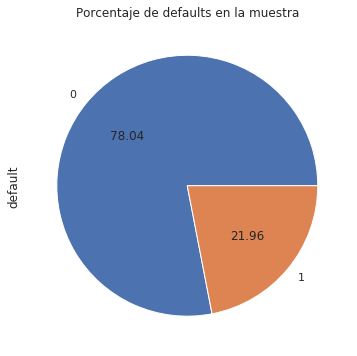

In [35]:
#En primer lugar revisamos el porcentaje de registros que son default y los que no
plot = train['default'].value_counts().plot(kind='pie', autopct='%.2f', 
                                            figsize=(6, 6),
                                            title='Porcentaje de defaults en la muestra')

In [36]:
#Vemos el porcentaje de default

train.default.sum()/len(train.default)

0.21961038961038962

El 21,96% de los clientes de la muestra no pagan el crédito

### Distribución según sexo

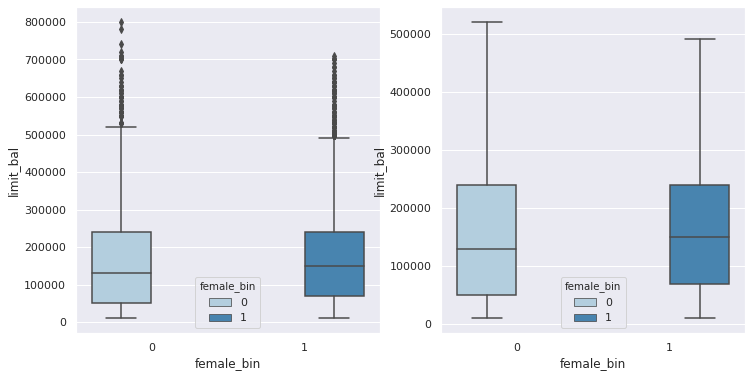

In [37]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="female_bin", y="limit_bal", hue="female_bin",data=df_numerical, palette="Blues",showfliers=True)
s = sns.boxplot(ax = ax2, x="female_bin", y="limit_bal", hue="female_bin",data=df_numerical, palette="Blues",showfliers=False)
plt.show();

Hemos dibujado un boxplot con los outliers para que se vea la foto completa y otra sin los outliers, para que se vean mejor los cuartiles y la mediana. En ambos boxplot vemos que las distribuciones son similares, pero Q2 (mediana) es algo mayor en las mujeres (female_bin=1)

### Matriz de correlación

In [38]:
#Creamos la matriz de correlación
corr=df_numerical.corr()
corr

,limit_bal,age,repay_status_sep05,repay_status_aug05,repay_status_jul05,repay_status_jun05,repay_status_may05,repay_status_apr05,bill_amt_sep05,bill_amt_aug05,bill_amt_jul05,bill_amt_jun05,bill_amt_may05,bill_amt_apr05,pay_amt_sep05,pay_amt_aug05,pay_amt_jul05,pay_amt_jun05,pay_amt_may05,pay_amt_apr05,default,female_bin,married_bin
limit_bal,1.000000,0.135452,-0.242673,-0.263593,-0.254333,-0.245946,-0.225637,-0.213648,0.261204,0.256266,0.253923,0.265379,0.266540,0.259282,0.181674,0.154249,0.190809,0.181159,0.189204,0.197628,-0.141119,0.024994,0.092623
age,0.135452,1.000000,-0.033748,-0.044328,-0.046399,-0.040498,-0.047143,-0.043408,0.055245,0.051877,0.052702,0.054125,0.050053,0.049194,0.020511,0.018181,0.026481,0.010439,0.024528,0.013193,0.012766,-0.083139,0.410963
repay_status_sep05,-0.242673,-0.033748,1.000000,0.613642,0.525041,0.491708,0.459431,0.429204,0.177845,0.177330,0.167490,0.166878,0.171387,0.160870,-0.074224,-0.063578,-0.062698,-0.058352,-0.051159,-0.045595,0.285924,-0.059450,-0.006366
repay_status_aug05,-0.263593,-0.044328,0.613642,1.000000,0.693240,0.600337,0.561434,0.517677,0.215337,0.216334,0.207902,0.205018,0.202586,0.195579,-0.077995,-0.052853,-0.054254,-0.044524,-0.028808,-0.031912,0.236588,-0.066574,-0.015073
repay_status_jul05,-0.254333,-0.046399,0.525041,0.693240,1.000000,0.708715,0.622140,0.570440,0.192015,0.214863,0.205633,0.209110,0.202239,0.197076,0.003584,-0.063029,-0.051925,-0.042025,-0.027431,-0.029972,0.208713,-0.065271,-0.027076
repay_status_jun05,-0.245946,-0.040498,0.491708,0.600337,0.708715,1.000000,0.746564,0.653028,0.184460,0.206553,0.219695,0.221724,0.215200,0.214582,-0.006593,-0.004031,-0.067042,-0.040091,-0.031036,-0.019132,0.194227,-0.058512,-0.030458
repay_status_may05,-0.225637,-0.047143,0.459431,0.561434,0.622140,0.746564,1.000000,0.741547,0.183594,0.206861,0.215470,0.242483,0.239356,0.234187,-0.000520,-0.003629,0.016143,-0.054607,-0.032114,-0.016156,0.180854,-0.048955,-0.029244
repay_status_apr05,-0.213648,-0.043408,0.429204,0.517677,0.570440,0.653028,0.741547,1.000000,0.185929,0.206502,0.213725,0.238388,0.260808,0.250986,0.000328,-0.002216,0.007150,0.022361,-0.044320,-0.020912,0.170012,-0.037461,-0.024099
bill_amt_sep05,0.261204,0.055245,0.177845,0.215337,0.192015,0.184460,0.183594,0.185929,1.000000,0.863708,0.808132,0.782619,0.748738,0.726983,0.121399,0.089138,0.138544,0.131013,0.149807,0.159136,-0.016031,-0.029841,0.027587
bill_amt_aug05,0.256266,0.051877,0.177330,0.216334,0.214863,0.206553,0.206861,0.206502,0.863708,1.000000,0.843544,0.814221,0.781551,0.753034,0.264930,0.090563,0.121978,0.120961,0.144738,0.156425,-0.008469,-0.030371,0.019270


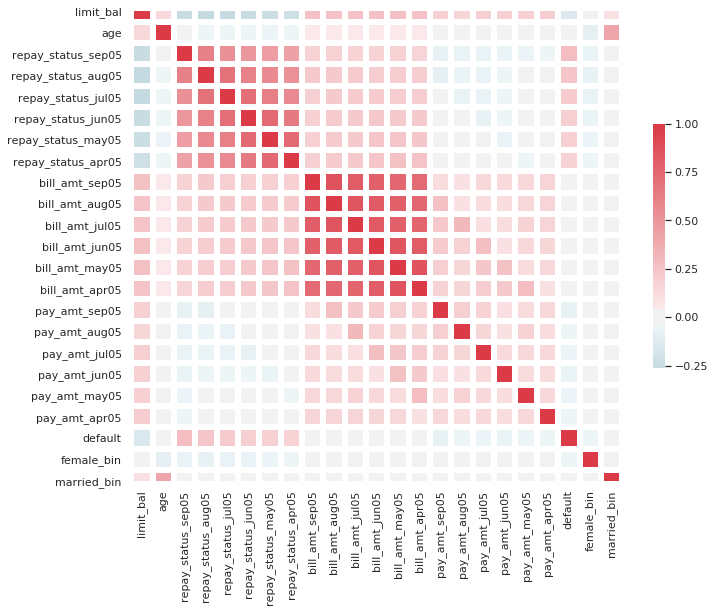

In [39]:
#Pintamos la matriz de correlación
f, ax = plt.subplots(figsize =(11,9))
cmap = sns.diverging_palette(220,10, as_cmap=True)
sns.heatmap(corr, cmap = cmap, vmax = 1, center = 0, square = True, linewidths =5, cbar_kws={'shrink':.5})

In [40]:
#Calculamos qué par de variables están correlacionadas > 0.7
#Tomamos un 0,7 debido a que tenemos correlaciones altas y queremos observar las más elevadas

sol =(corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool)).stack().sort_values(ascending=True))

sol[sol > 0.7]

repay_status_jul05  repay_status_jun05    0.708715
bill_amt_sep05      bill_amt_apr05        0.726983
repay_status_may05  repay_status_apr05    0.741547
repay_status_jun05  repay_status_may05    0.746564
bill_amt_sep05      bill_amt_may05        0.748738
bill_amt_aug05      bill_amt_apr05        0.753034
bill_amt_jul05      bill_amt_apr05        0.765500
bill_amt_aug05      bill_amt_may05        0.781551
bill_amt_sep05      bill_amt_jun05        0.782619
bill_amt_jul05      bill_amt_may05        0.793202
bill_amt_sep05      bill_amt_jul05        0.808132
bill_amt_jun05      bill_amt_apr05        0.809317
bill_amt_aug05      bill_amt_jun05        0.814221
bill_amt_jul05      bill_amt_jun05        0.831996
bill_amt_aug05      bill_amt_jul05        0.843544
bill_amt_jun05      bill_amt_may05        0.844135
bill_amt_may05      bill_amt_apr05        0.853515
bill_amt_sep05      bill_amt_aug05        0.863708
dtype: float64

Analizamos las correlaciones:


*   En el caso de los estados de reembolso (*repay_status*) vemos que la correlación crece cuando los meses están más juntos, esto tiene sentido ya que si se paga debidamente en un mes será muy extraño que los meses siguientes tengas varios retrasos y viceversa.
*   En cuanto a los saldos en cuenta (*bill_amt*) vemos correlaciones bastante altas (hasta 0,86) también entre meses juntos. Esto tiene mucho sentido ya que al tener correlación entre los estados de reembolso habrá incluso más en los saldos de la cuenta. Un mes que en el que el estado de reembolso sea similar al mes anterior (o al siguiente), lo normal es que el saldo de cuenta entre ese mes y el anterior (o el siguiente) sea similar
*   Viendo las correlaciones de default, podemos intuir que las variables limit_bal y todas las de repay_status serán las que más influyan en si el crédito del cliente se volverá 'default' o no.

### Relación entre límite de crédito y créditos impagados

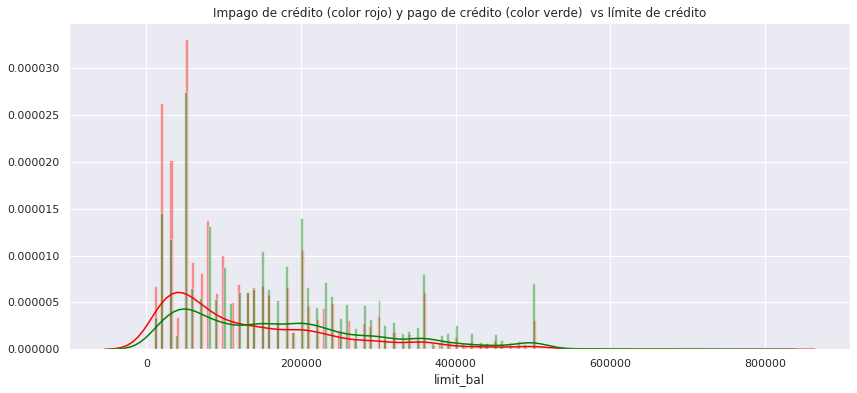

In [41]:
class_0 = train.loc[train['default'] == 0]["limit_bal"]
class_1 = train.loc[train['default'] == 1]["limit_bal"]
plt.figure(figsize = (14,6))
plt.title('Impago de crédito (color rojo) y pago de crédito (color verde)  vs límite de crédito')
sns.set_color_codes("pastel")
sns.distplot(class_1,kde=True,bins=200, color="red")
sns.distplot(class_0,kde=True,bins=200, color="green")
plt.show()

Por lo que vemos en el diagrama, se puede apreciar que nos encontramos más impagos en el rango de 0-150.000  siendo al comienzo de este rango cuando más se eleva la curva de impagos

In [0]:
#Creamos un DataFrame para comparar las variables 'married_bin', 'education' y 'female_bin' con 'default'
df_bool_and_categorical = train[['married_bin','education','female_bin']]

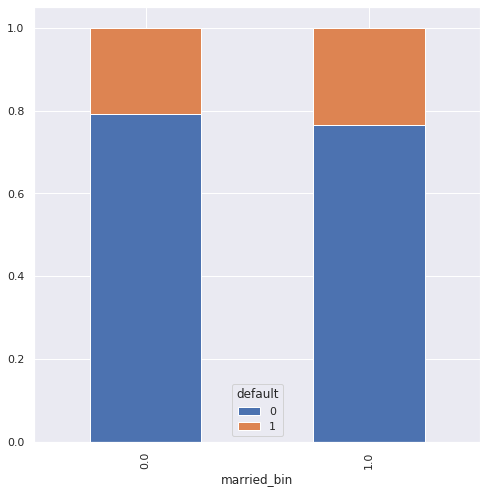

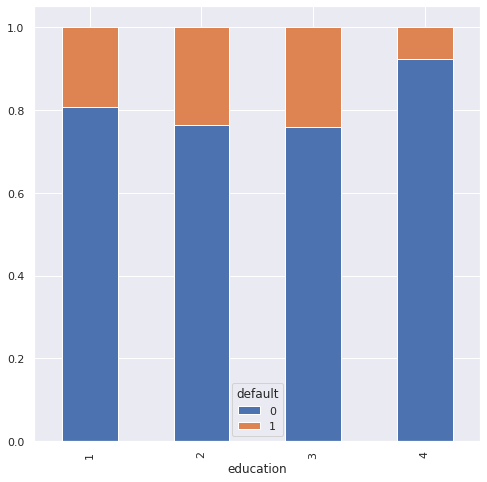

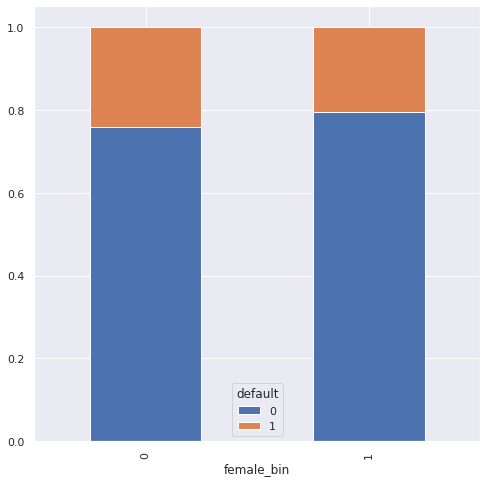

In [43]:
for x in df_bool_and_categorical.columns:
  freq = pd.crosstab(index = df_bool_and_categorical[x], 
                          columns=train["default"]).apply(lambda r: r/r.sum(), axis =1)
  freq.plot(kind="bar", 
                 figsize=(8,8),
                 stacked= True)

In [44]:
#Para ver los valores que componen el gráfico de 'education' frente a 'default' hacemos un crosstab
pd.crosstab(index = train['education'], 
                          columns=train["default"]).apply(lambda r: r/r.sum(), axis =1)

default,0,1
education,,
1,0.806199,0.193801
2,0.763484,0.236516
3,0.758315,0.241685
4,0.922330,0.077670


Según la muestra, la probabilidad de impago de las mujeres es ligeramente inferior al de los hombres

Por otro lado, en la muestra, las personas casadas tienen una probabilidad de impago muy ligeramente superior, pero la diferencia es muy pequeña como para asegurar que es un patrón.

En cuanto a Education el número 4 ('Others') es el que menor probabilidad de impago tiene. No obstante es una parte demasiado pequeña de la muestra para extraer conclusiones. Además llama la atención que los grupos 2 y 3, ('University' y 'High School') tienen la probabilidad de impago más alta. Esto está unido a que son los colectivos con el límite de crédito más bajo, como se puede ver en el boxplot.

In [0]:
#Creamos una variable binaria que determine si ha habido retraso en el pago mensual, unificando los retrasos en la variable 1 y las cuotas pagadas debidamente, independientemente del tipo de pago, en la 0.
#Posteriormente hallamos la media para tener sólo una variable con la que comparar default.
train["delay_sep05"] = train["repay_status_sep05"].replace({-2: 0, -1:0, 2:1, 3:1, 4:1, 5:1, 6:1, 7:1, 8:1})
train['delay_aug05'] = train['repay_status_aug05'].replace({-2: 0, -1:0, 2:1, 3:1, 4:1, 5:1, 6:1, 7:1, 8:1})
train["delay_jul05"] = train["repay_status_jul05"].replace({-2: 0, -1:0, 2:1, 3:1, 4:1, 5:1, 6:1, 7:1, 8:1})
train["delay_jun05"] = train["repay_status_jun05"].replace({-2: 0, -1:0, 2:1, 3:1, 4:1, 5:1, 6:1, 7:1, 8:1})
train["delay_may05"] = train["repay_status_may05"].replace({-2: 0, -1:0, 2:1, 3:1, 4:1, 5:1, 6:1, 7:1, 8:1})
train["delay_apr05"] = train["repay_status_apr05"].replace({-2: 0, -1:0, 2:1, 3:1, 4:1, 5:1, 6:1, 7:1, 8:1})
train['avg_delay'] = train[['delay_sep05','delay_aug05','delay_jul05','delay_jun05','delay_may05','delay_apr05']].mean(axis=1).round(2)

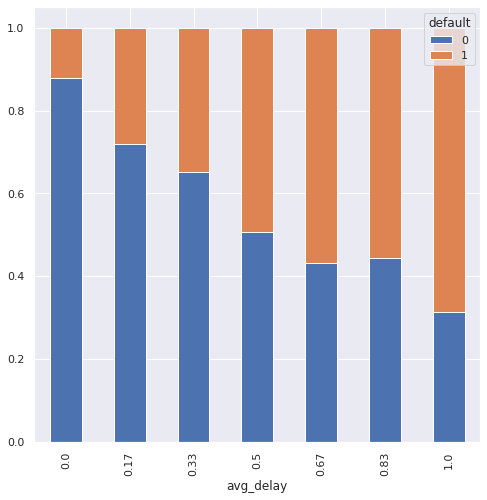

In [46]:
avg_crosstab = pd.crosstab(index=train["avg_delay"], 
                          columns=train["default"]).apply(lambda r: r/r.sum(), axis =1)
avg_crosstab.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

In [47]:
avg_crosstab

default,0,1
avg_delay,,
0.00,0.877537,0.122463
0.17,0.719676,0.280324
0.33,0.651861,0.348139
0.50,0.507937,0.492063
0.67,0.431918,0.568082
0.83,0.442922,0.557078
1.00,0.313789,0.686211


Lógicamente, indistintamente de la cantidad de meses de retraso en cada pago, cuantos más retrasos, mayor probabilidad de pago. De hecho, sólo con un retraso la probabilidad de impago aumenta del 12% al 28%. Si se retrasa en la mitad de los pagos, la probabilidad de impago es aproximadamente del 50%.

De esta forma, asumiendo que se repetirán los patrones de comportamiento de pagos, esta variable nos puede ayudar a predecir la probabilidad de pago de un cliente, basándonos en su historial de pago.

In [0]:
#Para analizar todas las variables de 'bill_amt' y 'pay_amt' hacemos dos promedios y lo analizamos con default
train['avg_bill_amt'] = train[['bill_amt_apr05','bill_amt_may05','bill_amt_jun05','bill_amt_jul05','bill_amt_aug05','bill_amt_sep05']].mean(axis=1).round(2)
train['avg_pay_amt'] = train[['pay_amt_apr05','pay_amt_may05','pay_amt_jun05','pay_amt_jul05','pay_amt_aug05','pay_amt_sep05']].mean(axis=1).round(2)

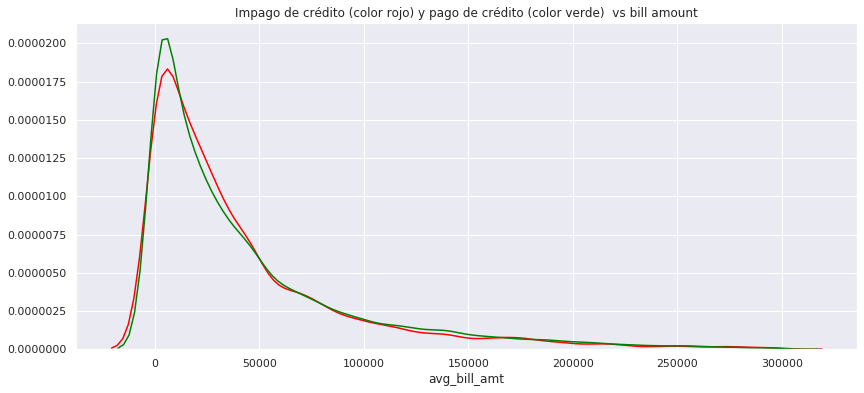

In [49]:
class_0 = train.loc[train['default'] == 0]["avg_bill_amt"]
class_1 = train.loc[train['default'] == 1]["avg_bill_amt"]
plt.figure(figsize = (14,6))
plt.title('Impago de crédito (color rojo) y pago de crédito (color verde)  vs bill amount')
sns.set_color_codes("pastel")
sns.distplot(class_1, hist=False, kde_kws={'clip': (0, 300000)}, color = 'red')
sns.distplot(class_0, hist=False, kde_kws={'clip': (0, 300000)}, color = 'green')
plt.show()

Ambas lineas tienen una distribución muy similar, así que no se pueden sacar conclusiones. En la realidad el pago o impago depende más de los pagos a realizar o el crédito solicitado, que del saldo en cuenta.

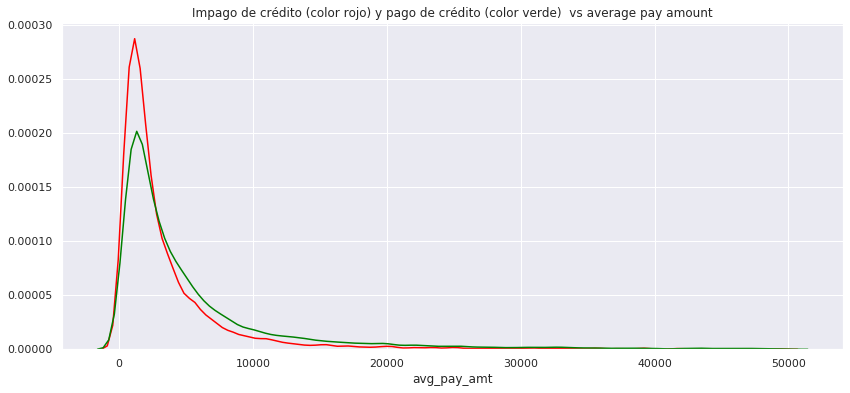

In [50]:
class_0 = train.loc[train['default'] == 0]["avg_pay_amt"]
class_1 = train.loc[train['default'] == 1]["avg_pay_amt"]
plt.figure(figsize = (14,6))
plt.title('Impago de crédito (color rojo) y pago de crédito (color verde)  vs average pay amount')
sns.set_color_codes("pastel")
sns.distplot(class_1, hist=False, kde_kws={'clip': (0, 50000)}, color = 'red')
sns.distplot(class_0, hist=False, kde_kws={'clip': (0, 50000)}, color = 'green')
plt.show()

Lo que sí vemos es que en casos donde hay más impagos es donde los pagos mensuales son menores o nulos.

## Estudiamos la muestra de los créditos impagados

  Como banco, nos interesaría saber cuál es el comportamiento habitual de los clientes que no pagan para tomar decisiones de cara al futuro. Si conseguimos averiguar algo sobre su comportamiento podremos predecir si una serie de patrones hacen que el cliente no vaya a pagar el crédito.

In [0]:
#Vamos a trabajar con el dataframe train pero solo con los default=1 ya que queremos ver si el comportamiento de los clientes que no pagan sigue algún patrón
train_def = train[train["default"]==1]

In [52]:
train_def.describe()

,limit_bal,age,repay_status_sep05,repay_status_aug05,repay_status_jul05,repay_status_jun05,repay_status_may05,repay_status_apr05,bill_amt_sep05,bill_amt_aug05,bill_amt_jul05,bill_amt_jun05,bill_amt_may05,bill_amt_apr05,pay_amt_sep05,pay_amt_aug05,pay_amt_jul05,pay_amt_jun05,pay_amt_may05,pay_amt_apr05,default,female_bin,married_bin,delay_sep05,delay_aug05,delay_jul05,delay_jun05,delay_may05,delay_apr05,avg_delay,avg_bill_amt,avg_pay_amt
count,5073.000000,5073.000000,5073.000000,5073.000000,5073.000000,5073.00000,5073.000000,5073.000000,5073.000000,5073.000000,5073.000000,5073.000000,5073.000000,5073.000000,5073.000000,5.073000e+03,5073.000000,5073.000000,5073.000000,5073.000000,5073.0,5073.000000,5070.000000,5073.000000,5073.00000,5073.000000,5073.000000,5073.000000,5073.000000,5073.000000,5073.000000,5073.000000
mean,133583.220974,35.676326,0.588803,0.400355,0.315789,0.21644,0.128129,0.081609,49281.592155,48021.835600,46171.328405,42400.995860,40076.609304,38679.234772,3566.342007,3.853007e+03,3655.841317,3293.027400,3370.266903,3727.205007,1.0,0.565149,0.487968,0.483343,0.35068,0.314212,0.268677,0.232013,0.228267,0.313387,44105.266054,3577.614824
std,116915.151918,9.601222,1.370763,1.484135,1.489852,1.49304,1.471785,1.475097,74201.547778,72257.082323,70037.392439,65240.182867,62119.974455,60345.019217,9677.018486,1.900209e+04,14357.871672,10472.012373,11621.635515,14441.421955,0.0,0.495786,0.499905,0.499772,0.47723,0.464247,0.443315,0.422159,0.419757,0.342693,62661.124442,6610.607686
min,10000.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.00000,-2.000000,-2.000000,-6676.000000,-17710.000000,-61506.000000,-65167.000000,-53007.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,-56043.170000,0.000000
25%,50000.000000,28.000000,0.000000,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,3280.000000,2817.000000,2500.000000,2146.000000,1585.000000,1240.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,5287.830000,874.000000
50%,90000.000000,34.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,20574.000000,20568.000000,20000.000000,19076.000000,18627.000000,18036.000000,1703.000000,1.600000e+03,1284.000000,1000.000000,1003.000000,1000.000000,1.0,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.170000,23245.670000,1769.500000
75%,200000.000000,42.000000,2.000000,2.000000,2.000000,2.00000,0.000000,0.000000,61189.000000,60353.000000,56950.000000,50706.000000,48633.000000,47758.000000,3600.000000,3.500000e+03,3000.000000,3000.000000,3000.000000,3000.000000,1.0,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,0.000000,0.000000,0.500000,54342.670000,3825.500000
max,800000.000000,75.000000,8.000000,7.000000,8.000000,8.00000,8.000000,8.000000,613860.000000,581775.000000,578971.000000,548020.000000,547880.000000,514975.000000,244500.000000,1.024516e+06,508229.000000,292462.000000,330982.000000,345293.000000,1.0,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,521248.330000,172009.830000


In [0]:
#Creamos un DataFrame que sólo tenga valores numéricos para el default
df_numerical2 = train_def.select_dtypes(include = ['int64','float'])

In [0]:
#Creamos la matriz de correlación
corr_def= df_numerical2.corr()

In [55]:
#Calculamos qué par de variables están correlacionadas > 0.7
#Tomamos un 0,7 debido a que tenemos correlaciones altas y queremos observar las más elevadas
sol2 =(corr_def.where(np.triu(np.ones(corr_def.shape),k=1).astype(np.bool)).stack().sort_values(ascending=True))

sol2[sol2 > 0.7]

repay_status_may05  avg_delay             0.705720
delay_apr05         avg_delay             0.715695
repay_status_aug05  repay_status_jul05    0.716067
repay_status_jun05  avg_delay             0.725784
repay_status_aug05  avg_delay             0.725898
repay_status_jul05  repay_status_jun05    0.727984
                    avg_delay             0.733444
bill_amt_sep05      bill_amt_apr05        0.773867
delay_may05         avg_delay             0.775834
bill_amt_aug05      bill_amt_apr05        0.784581
delay_aug05         avg_delay             0.785897
delay_jun05         avg_delay             0.786009
repay_status_may05  repay_status_apr05    0.787268
repay_status_jun05  repay_status_may05    0.790310
bill_amt_jul05      bill_amt_apr05        0.791626
delay_jul05         avg_delay             0.791859
bill_amt_sep05      bill_amt_may05        0.798157
repay_status_may05  delay_may05           0.821291
bill_amt_aug05      bill_amt_may05        0.821969
repay_status_apr05  delay_apr05

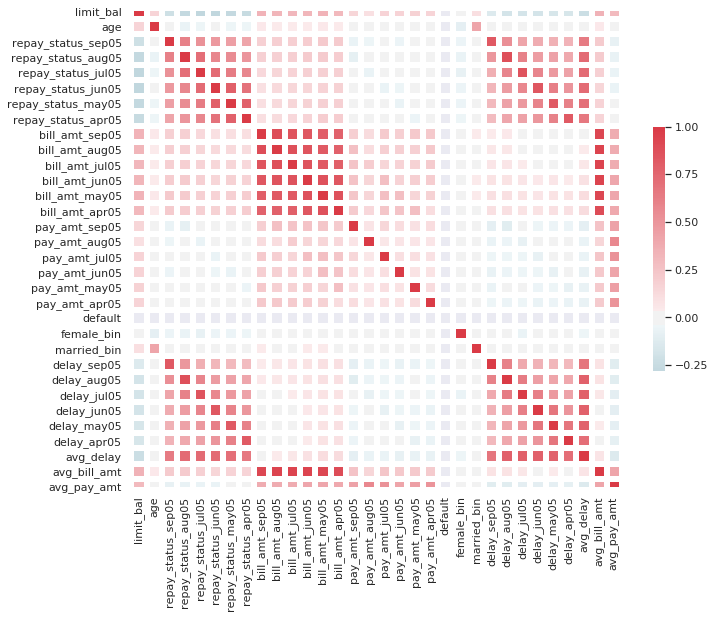

In [56]:
#Pintamos la matriz de correlación
f, ax = plt.subplots(figsize =(11,9))
cmap = sns.diverging_palette(220,10, as_cmap=True)
sns.heatmap(corr_def, cmap = cmap, vmax = 1, center = 0, square = True, linewidths =5, cbar_kws={'shrink':.5})

Como vemos, los resultados obtenidos al analizar la muestra de impagados, son los mismos que hemos obtenido antes al analizar el total de los clientes, seguimos teniendo correlaciones altas entre los meses más cercanos entre sí en las variables bill y repay

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

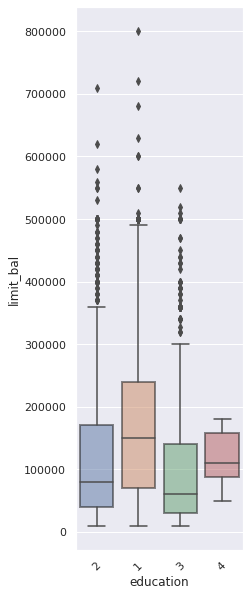

In [57]:
#Relacionamos el nivel educativo con el límite de crédito dentro de los créditos impagados
plt.figure(figsize = (3, 10))
ax = sns.boxplot(x='education', y='limit_bal', data=train_def)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

Al analizar el diagrama vemos que los clientes que tienen un nivel educativo de "graduate school"son los que piden los créditos más altos

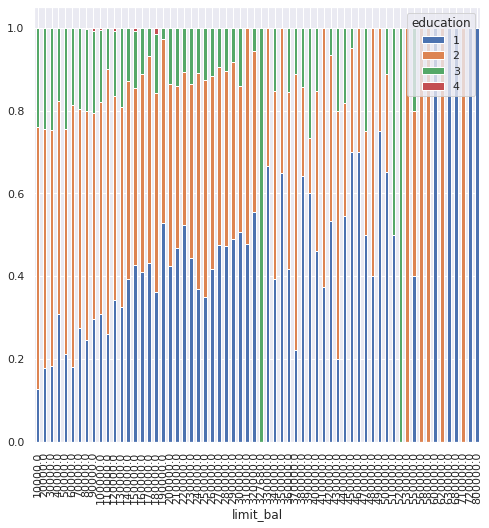

In [58]:
#Con un crosstab también podemos ver la misma tendencia que acabamos de comentar viendo los colores:
avg_crosstab = pd.crosstab(index=train_def["limit_bal"], 
                          columns=train_def["education"]).apply(lambda r: r/r.sum(), axis =1)
avg_crosstab.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

### Analizamos los retrasos en los pagos vs el resto de las variables dentro de los clientes que no pagan

In [59]:
#Vemos una pequeña muestra del data set con el que vamos a trabajar
train_def.head(5)

,id,limit_bal,education,age,repay_status_sep05,repay_status_aug05,repay_status_jul05,repay_status_jun05,repay_status_may05,repay_status_apr05,bill_amt_sep05,bill_amt_aug05,bill_amt_jul05,bill_amt_jun05,bill_amt_may05,bill_amt_apr05,pay_amt_sep05,pay_amt_aug05,pay_amt_jul05,pay_amt_jun05,pay_amt_may05,pay_amt_apr05,default,female_bin,married_bin,delay_sep05,delay_aug05,delay_jul05,delay_jun05,delay_may05,delay_apr05,avg_delay,avg_bill_amt,avg_pay_amt
0,7546,20000.0,2,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,1,1.0,1,1,0,0,0,0,0.33,1284.00,114.83
1,27999,120000.0,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,1,0.0,0,1,0,0,0,1,0.33,2846.17,833.33
10,19202,70000.0,2,30,1,2,2,0,0,2,65802.0,67369.0,65701.0,66782.0,36137.0,36894.0,3200.0,0.0,3000.0,3000.0,1500.0,0.0,1,0,0.0,1,1,1,0,0,1,0.67,56447.50,1783.33
13,6857,20000.0,1,24,0,0,2,2,2,2,15376.0,18010.0,17428.0,18338.0,17905.0,19104.0,3200.0,0.0,1500.0,0.0,1650.0,0.0,1,0,0.0,0,0,1,1,1,1,0.67,17693.50,1058.33
17,17291,120000.0,2,39,-1,-1,-1,-1,-1,-1,316.0,316.0,316.0,0.0,632.0,316.0,316.0,316.0,0.0,632.0,316.0,0.0,1,1,1.0,0,0,0,0,0,0,0.00,316.00,263.33


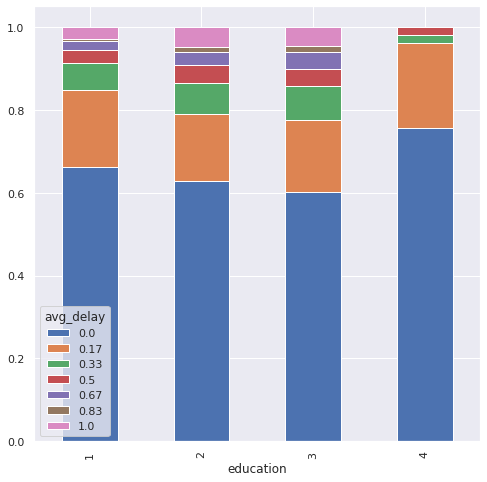

In [60]:
#Representamos la educación vs la media del estado del reembolso de los pagos
avg_crosstab = pd.crosstab(index=train["education"], 
                          columns=train["avg_delay"]).apply(lambda r: r/r.sum(), axis =1)
avg_crosstab.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

Nos encontramos que el número de retrasos es mayor en clientes con educación "high school". Teniendo en cuenta los gráficos anteriores, podemos concluir que los clientes con nivel educativo 'high school' y 'university' son los que más retrasos acumulan y mayor número de defaults tienen. Estos colectivos tenían la mediana de 'limit_bal' más baja (los créditos con un límite bajo y de clientes con el nivel de educación 2 y 3, con mayores niveles de retrasos son más propensos a los impagos).

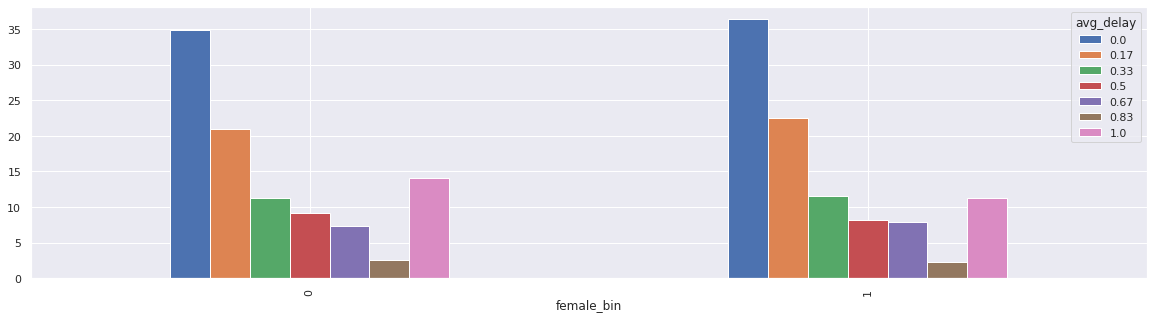

In [61]:
#Representamos el sexo vs la media del estado del reembolso de los pagos
plot = pd.crosstab(index=train_def['female_bin'],
            columns=train_def['avg_delay'],).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar',figsize=(20,5))

Se puede apreciar una ligera tendencia donde las mujeres tienen un estado de reembolso más cercano a 0 (devolver a tiempo) y los hombres a 1 (retraso)

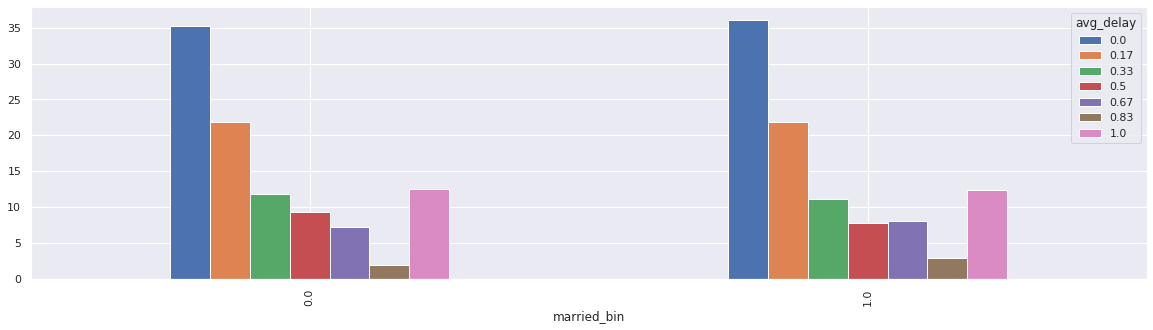

In [62]:
#Representamos el estado civil vs la media del estado del reembolso de los pagos
plot = pd.crosstab(index=train_def['married_bin'],
            columns=train_def['avg_delay'],).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar',figsize=(20,5))

No apreciamos nada destacable en este gráfico, por lo que vemos para los clientes que no pagan los créditos el estado de pagos no tiene apenas relación con el estado civil

### Probamos a estudiar las personas que pagan los créditos (default=0) 

In [0]:
#Construimos el dataset con el default = 0 (los que han pagado el crédito)
train_nodef = train[train["default"]==0]

In [0]:
df_numerical3 = train_nodef.select_dtypes(include = ['int64','float'])

In [65]:
train_nodef.describe()

,limit_bal,age,repay_status_sep05,repay_status_aug05,repay_status_jul05,repay_status_jun05,repay_status_may05,repay_status_apr05,bill_amt_sep05,bill_amt_aug05,bill_amt_jul05,bill_amt_jun05,bill_amt_may05,bill_amt_apr05,pay_amt_sep05,pay_amt_aug05,pay_amt_jul05,pay_amt_jun05,pay_amt_may05,pay_amt_apr05,default,female_bin,married_bin,delay_sep05,delay_aug05,delay_jul05,delay_jun05,delay_may05,delay_apr05,avg_delay,avg_bill_amt,avg_pay_amt
count,18027.000000,18027.000000,18027.000000,18027.000000,18027.000000,18027.000000,18027.000000,18027.000000,18027.000000,18027.000000,1.802700e+04,18027.000000,18027.000000,18027.000000,18027.000000,1.802700e+04,18027.000000,18027.000000,18027.000000,18027.000000,18027.0,18027.000000,17991.000000,18027.000000,18027.000000,18027.000000,18027.000000,18027.000000,18027.000000,18027.000000,18027.000000,18027.000000
mean,177671.381816,35.393133,-0.190104,-0.286681,-0.292173,-0.333444,-0.369390,-0.391690,52122.045321,49462.807400,4.752142e+04,43586.182171,40619.271537,39369.293005,6261.529206,6.461417e+03,5544.794087,5292.763688,5100.806291,5516.956565,0.0,0.612637,0.449892,0.153048,0.089532,0.093138,0.075997,0.061574,0.067954,0.090569,45446.835821,5696.377779
std,131008.756199,9.061634,0.983823,1.062363,1.076001,1.032821,0.999091,1.020137,73101.181109,69916.449379,6.926122e+04,63901.381092,60215.064457,59305.216225,17129.591052,2.505524e+04,16497.361193,16551.115945,15288.601994,17590.609526,0.0,0.487161,0.497497,0.360044,0.285519,0.290634,0.265001,0.240387,0.251673,0.190298,59943.826132,9741.124833
min,10000.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-61372.000000,-150953.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-13255.000000,0.000000
25%,60000.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3698.500000,3031.500000,2.841000e+03,2318.000000,1840.000000,1300.500000,1144.000000,1.000000e+03,567.500000,390.000000,350.000000,274.500000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6130.165000,1290.750000
50%,150000.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22943.000000,21696.000000,2.018900e+04,18907.000000,18026.000000,16876.000000,2450.000000,2.228000e+03,2000.000000,1700.000000,1735.000000,1657.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24234.000000,2824.170000
75%,250000.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69716.000000,65698.000000,6.250700e+04,56143.000000,51551.500000,50513.500000,5549.000000,5.203000e+03,5000.000000,4500.000000,4511.000000,4500.000000,0.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.170000,59285.000000,6142.670000
max,780000.000000,79.000000,8.000000,8.000000,8.000000,8.000000,7.000000,7.000000,964511.000000,743970.000000,1.664089e+06,706864.000000,823540.000000,699944.000000,505000.000000,1.684259e+06,417588.000000,497000.000000,426529.000000,527143.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,592431.830000,385692.000000


In [0]:
corr_nodef= df_numerical3.corr()

In [67]:
sol3 =(corr_nodef.where(np.triu(np.ones(corr_def.shape),k=1).astype(np.bool)).stack().sort_values(ascending=True))

sol3[sol3 > 0.7]

repay_status_may05  repay_status_apr05    0.701151
delay_jul05         avg_delay             0.702068
repay_status_jun05  repay_status_may05    0.705758
bill_amt_sep05      bill_amt_apr05        0.713391
delay_aug05         avg_delay             0.725762
repay_status_aug05  delay_aug05           0.726756
repay_status_jul05  delay_jul05           0.729015
bill_amt_sep05      bill_amt_may05        0.734254
bill_amt_aug05      bill_amt_apr05        0.743714
bill_amt_jul05      bill_amt_apr05        0.757933
bill_amt_sep05      bill_amt_jun05        0.766314
bill_amt_aug05      bill_amt_may05        0.769429
bill_amt_jul05      bill_amt_may05        0.782765
bill_amt_sep05      bill_amt_jul05        0.794781
bill_amt_aug05      bill_amt_jun05        0.801512
bill_amt_jun05      bill_amt_apr05        0.801533
bill_amt_jul05      bill_amt_jun05        0.822956
bill_amt_aug05      bill_amt_jul05        0.834031
bill_amt_jun05      bill_amt_may05        0.836310
bill_amt_may05      bill_amt_ap

La matriz obtenida es muy similar a los casos anteriores, por lo que no analizaremos este colectivo

## Conclusiones y comentarios

### *Data set*

Observamos la calidad de los datos de la muestra de estudio, al ser datos de clientes "reales", los datos son consistentes y no hace falta realizar grandes transformaciones para trabajar con ellos.
Los procesos de limpieza son secillos; como hemos visto no hay nulos, registros únicos, no es necesario eliminar outliers y los datos se nos dan en un único dataset lo que hace que no se tengan que unir varias tablas de clientes.

Las variables que aparecen son descriptivas pero algo confusas con el racional del ejercicio. Probablemente si una empresa quiere saber diferencias entre clientes que pagan y no pagan los créditos tenga que tener en cuenta más variables como son el plazo del crédito, el tipo de interés, amortización, rating del cliente, etc.

En este problema se quieren observar diferencias en base a comportamientos o actuaciones sacando mucha información de los clientes pero concentrada en unos meses dados, quizá hubiera sido más razonable que el dataset abarcara períodos más amplios (debido a las cantidades de los créditos)


### *Análisis de los datos y resultados*

*   A la hora de preveer los impagos, el banco debería de fijarse en el número de retrasos en el pago de las cuotas. El estado del reembolso de las cuotas es una señal muy significativa del pago o no del crédito. De media se obtienen menos impagos en los casos donde los clientes pagan debidamente las cuotas, 
*   En cuanto a los atributos personales de los clientes, las mujeres tienen una probabilidad de pago superior. No se observan diferencias en el comportamiento de los clientes que están casados y los que no.
*  Los clientes con nivel educativo 'high school' y 'university' son los que más retrasos acumulan y donde se aprecia un mayor número de impagos. Estos colectivos tenían la mediana de 'limit_bal' más baja, por lo tanto podemos concluir que los créditos con un límite bajo solicitados por clientes con el nivel de educación 2 y 3 y con mayores niveles de retrasos en los pagos son más propensos a los impagos. Este puede ser un insight importante para la empresa.
*   El banco debería atender si la media de pagos realizados es muy baja, ya que la probabilidad de impagos es más alta.




